# Assignment 1

## Deep convolutional networks - new topic

> each convolutional filter samples from the limited space in the previous layer’s feature map
> need more layers to allow more spatial integration
> multiple feature maps at each layer to capture the multiple meaningful spatial relationships that are possible
> increases computational load

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [8]:
# dataset of 60k grayscale images of handwritten numbers (x_train) and 
# labels of each picture (y_train)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Reshape x_train to size 60000, 28, 28, 1. Reshape x_test to size 10000, 28, 28, 1. 
### WHY? -1
x_train = np.expand_dims(x_train, -1) # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1) # (10000, 28, 28, 1)
print("shape of training set", x_train.shape)
print("shape of test set", x_test.shape)

# Rescale both results to values between zero and one as before.
x_train = x_train/255
x_test = x_test/255

# the labels y_train and y_test are categorial units (like previous exercises)
# 10 categories numbers 0-9
y_train = keras.utils.to_categorical(y_train, 10)# 10=number of classes
y_test = keras.utils.to_categorical(y_test, 10)

print("\n labels for training\n", y_train[1])
print("\n and test\n", y_test[1])

shape of training set (60000, 28, 28, 1)
shape of test set (10000, 28, 28, 1)

 labels for training
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

 and test
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# convolutional model with two layers

model3 = keras.Sequential()
# 2 convolutional layers
model3.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))#32 filters in the first layer
model3.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")) # 64 filters in the second layer with 3x3 pixel filters
#pooling to downsize layer to half it's size (2,2) in both dimensions
model3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
#flatten to one dimension
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128, activation="relu"))
model3.add(keras.layers.Dense(10, activation="softmax"))

#compile the model #default learning rate is 0.001
model3.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(learning_rate=1), #learning rate = how much the parameters change after each epoch
              metrics='accuracy')

# fit the model
history3 = model3.fit(x_train, y_train, batch_size=128, epochs=6, validation_split=0.2)

model3.summary()

Epoch 1/6
375/375 [==============================] - 44s 117ms/step - loss: 0.2357 - accuracy: 0.9270 - val_loss: 0.0740 - val_accuracy: 0.9783
Epoch 2/6
375/375 [==============================] - 43s 116ms/step - loss: 0.0514 - accuracy: 0.9843 - val_loss: 0.0483 - val_accuracy: 0.9853
Epoch 3/6
375/375 [==============================] - 44s 118ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0471 - val_accuracy: 0.9861
Epoch 4/6
375/375 [==============================] - 44s 118ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0439 - val_accuracy: 0.9873
Epoch 5/6
375/375 [==============================] - 44s 117ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0432 - val_accuracy: 0.9875
Epoch 6/6
375/375 [==============================] - 45s 120ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0475 - val_accuracy: 0.9876
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape       

Question 10: Plot the training history and show this to your teacher

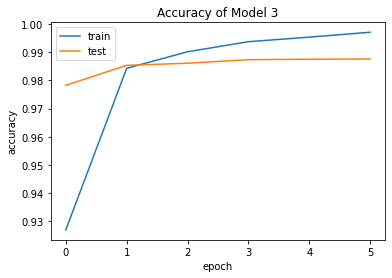

In [10]:
# Answer 10

# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy of Model 3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

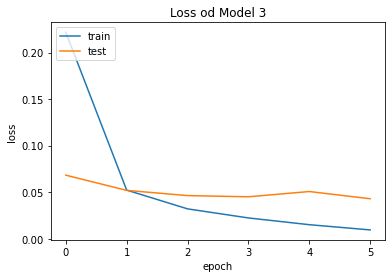

In [18]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss od Model 3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Question 11: Discuss with your group, then describe to your teacher, how the training history differs from the previous model, for the training and validation sets. What does this tell us about the generalisation of the model?

Answer 11: The accuracy of the model improved significantly compared to the precious models. Even after the first epoch both the training and the test data jumped to over 0.98. However, while the training data still showed an increase in accuracy for the model, the test data barely imporved after the first epoch. As the accuracy of the training data is higher than the test data one would have to assume that the model is slightly overfitted. 

Question 12: Show your teacher what values you get for the model’s accuracy and loss

In [11]:
#Answer 12: 
accuracy, loss = model3.evaluate(x_test, y_test, verbose=0)
print("accuracy of Model 3:", accuracy)
print("loss of Model 3:", loss)

accuracy of Model 3: 0.03574914112687111
loss of Model 3: 0.989300012588501


### Question 13:
Discuss with your group, then describe to your teacher, whether this accuracy is sufficient for some uses of automatic hand-written digit classification

Answer 13: The accuracy of the model is good with ~ 0.99. However, the answer to this qeustion depends on the the use for the model. While 99% might be perfectly sufficient for notetaking on a personal device or a less serious use, if every 100th person doesn't cannot send a check to the intended person or if every 100th letter get's send to the wrong zipcode, this would of course be an issue. 

In [4]:
# add dropout layers
# convolutional model with two layers

model4 = keras.Sequential()
# 2 convolutional layers
model4.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))#32 filters in the first layer
model4.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")) # 64 filters in the second layer with 3x3 pixel filters
#pooling to downsize layer to half it's size (2,2) in both dimensions
model4.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
##### ADD Dropout of 0.25
model4.add(keras.layers.Dropout(rate=0.25))
#flatten to one dimension
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(128, activation="relu"))
#### ADD Dropout of 0.5
model4.add(keras.layers.Dropout(rate=0.5))
model4.add(keras.layers.Dense(10, activation="softmax"))
#compile the model
model4.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(learning_rate=1),
              metrics='accuracy')

# fit the model
history4 = model4.fit(x_train, y_train, batch_size=128, epochs=6, validation_split=0.2)


Epoch 1/6
375/375 [==============================] - 47s 126ms/step - loss: 0.3084 - accuracy: 0.9041 - val_loss: 0.0778 - val_accuracy: 0.9771
Epoch 2/6
375/375 [==============================] - 47s 126ms/step - loss: 0.1033 - accuracy: 0.9695 - val_loss: 0.0555 - val_accuracy: 0.9837
Epoch 3/6
375/375 [==============================] - 47s 126ms/step - loss: 0.0727 - accuracy: 0.9792 - val_loss: 0.0447 - val_accuracy: 0.9871
Epoch 4/6
375/375 [==============================] - 46s 123ms/step - loss: 0.0577 - accuracy: 0.9830 - val_loss: 0.0433 - val_accuracy: 0.9872
Epoch 5/6
375/375 [==============================] - 46s 124ms/step - loss: 0.0518 - accuracy: 0.9843 - val_loss: 0.0465 - val_accuracy: 0.9868
Epoch 6/6
375/375 [==============================] - 47s 126ms/step - loss: 0.0454 - accuracy: 0.9861 - val_loss: 0.0399 - val_accuracy: 0.9890


In [5]:
loss, accuracy = model4.evaluate(x_test, y_test, verbose=0)
print("loss of Model 4:", loss)
print("accuracy of Model 4:", accuracy)

loss of Model 4: 0.02879650518298149
accuracy of Model 4: 0.9901000261306763


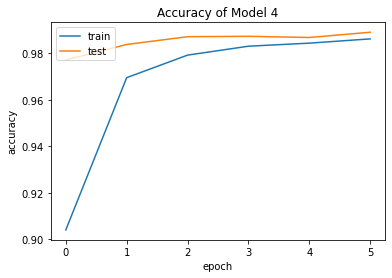

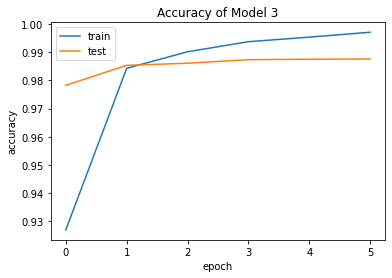

In [12]:
# to answer question 14
# summarize history for accuracy Model 4
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Accuracy of Model 4')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy of Model 3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 14:
Discuss with your group, then describe to your teacher, how the training history
differs from the previous (convolutional) model, for both the training and validation
sets, and for the time taken to run each model epoch

Answer 14: The model 3 (convolutional model) shows a faster improvement in accuracy after the first epoch and jumps to apx. 0.98 after the first epoch while model 4 is at 0.96 after the first run. Model 4 however, increases the accuracy up to the 5th epoch where the training and test datasets run paralletl in the plot above which shows that the generalizability does not improve further. Model 3 shows an increase in accuracy of the test set which is significantly bigger than the training set. This indicated overfitting. Over the run of all 6 epochs the training and test accuracy grow a larger distance in accuracy which indicated that the models generalizability decreases over the course of the runs while the accuracy of the training data increases. The computational cost that is a bit higher in model 4 than in model 3 is 


### Question 15:
Discuss with your group, then describe to your teacher, what this tells us about the generalisation of the two models.

Answer 15: The difference between the two models is especially important as this model does not show signs of overfitting like the model 3 (convolutional model) where the training accuracy was better than the test accuracy. In this case the model performs even better on the test dataset. With an accuracy of 0.9901 the models accuracy didn't differ much from the accuracy of model 3 (0.9893) , however the fact that there is no indicator of overfitting makes it a better model. the distance between the training dataset and the test dataset as plottet above is smaller than in model 3 while the accuracy increased. This makes model 4 a better model with a better generalisability of the model. 
